# 1. EDA Workflow

## Setup

Data manipulation libraries:

In [32]:
import pandas as pd
import numpy  as np

Visualization libraries:

In [ ]:
import matplotlib.pyplot  as plt
import seaborn            as sns

plt.style.use('fivethirtyeight')

%matplotlib inline

Pre-processing libraries:

In [ ]:
from sklearn.model_selection  import train_test_split

from scipy.stats              import boxcox 
from tqdm.notebook            import tqdm

import datetime

## Data-set

In [4]:
file_path = 'BitcoinHeistData.csv'

data = pd.read_csv(file_path)

## Data Overview

In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2916697 entries, 0 to 2916696
Data columns (total 10 columns):
 #   Column     Dtype  
---  ------     -----  
 0   address    object 
 1   year       int64  
 2   day        int64  
 3   length     int64  
 4   weight     float64
 5   counted    int64  
 6   looped     int64  
 7   neighbors  int64  
 8   income     float64
 9   label      int64  
dtypes: float64(2), int64(7), object(1)
memory usage: 222.5+ MB


In [35]:
data.head()

,address,year,day,length,weight,counted,looped,neighbors,income,label
0,111K8kZAEnJg245r2cM6y9zgJGHZtJPy6,2017,11,18,0.008333,1,0,2,100050000.0,1
1,1123pJv8jzeFQaCV4w644pzQJzVWay2zcA,2016,132,44,0.000244,1,0,1,100000000.0,1
2,112536im7hy6wtKbpH1qYDWtTyMRAcA2p7,2016,246,0,1.000000,1,0,2,200000000.0,1
3,1126eDRw2wqSkWosjTCre8cjjQW8sSeWH7,2016,322,72,0.003906,1,0,2,71200000.0,1
4,1129TSjKtx65E35GiUo4AYVeyo48twbrGX,2016,238,144,0.072848,456,0,1,200000000.0,1


In [36]:
data.sample(5)

,address,year,day,length,weight,counted,looped,neighbors,income,label
2678250,38oizctkGYbJuGWePs9Dwhi1JSWBWJLo9n,2018,92,0,1.00,1,0,2,1.261885e+09,0
804877,1EWLpAobsMVuCwk9zzdzm4N9MsumxsNsoK,2013,44,0,0.50,1,0,1,5.000000e+09,0
2402424,1BJkLumTHk9MzcMQC3YaZEnR3zX3ehozUA,2017,181,0,1.00,1,0,2,9.981900e+07,0
884908,1JrEqa1JssEVbcxq3yfSQ15ipe56S14rGF,2013,124,0,1.00,1,0,2,4.999750e+09,0
176914,1NvwCmwtPGWHwUpJwM5g4pDFopiaTcDNLc,2011,146,2,0.25,1,0,1,4.500000e+07,0


In [37]:
data.tail()

,address,year,day,length,weight,counted,looped,neighbors,income,label
2916692,12D3trgho1vJ4mGtWBRPyHdMJK96TRYSry,2018,330,0,0.111111,1,0,1,1.255809e+09,0
2916693,1P7PputTcVkhXBmXBvSD9MJ3UYPsiou1u2,2018,330,0,1.000000,1,0,1,4.409699e+07,0
2916694,1KYiKJEfdJtap9QX2v9BXJMpz2SfU4pgZw,2018,330,2,12.000000,6,6,35,2.398267e+09,0
2916695,15iPUJsRNZQZHmZZVwmQ63srsmughCXV4a,2018,330,0,0.500000,1,0,1,1.780427e+08,0
2916696,3LFFBxp15h9KSFtaw55np8eP5fv6kdK17e,2018,330,144,0.073972,6800,0,2,1.123500e+08,0


In [38]:
print('Data has {} rows and {} columns'.format(data.shape[0], data.shape[1]))

Data has 2916697 rows and 10 columns


In [39]:
print('Data columns: \n{}'.format(list(data.columns)[:-1]))

Data columns: 
['address', 'year', 'day', 'length', 'weight', 'counted', 'looped', 'neighbors', 'income']


## Checking for NaN

In [40]:
data.isnull().values.any()

False

## Droping any duplicates 

In [41]:
data = data.drop_duplicates()

In [42]:
data.shape

(2916697, 10)

## Rename 

The count column may confuse the computer with the count() function,
so lets rename it.

In [6]:
data.rename(columns={'count':'counted'},inplace=True)

##  Classes preparing

The positive class is any kind of "ransomware label" will takes '1' as value.  
The negative class is the "White label" will takes '0' as value. 

In [7]:
data['label'] = data['label'].apply(lambda x: 0 if x == 'white' else 1)

In [8]:
print('Number of white (non-ransomware) datapoints: {}\nNumber of ransomware datapoints: {}'\
      .format(data['label'].value_counts
              ()[0], 
              sum(data['label'].value_counts()[1:])
             ))

Number of white (non-ransomware) datapoints: 2875284
Number of ransomware datapoints: 41413


In [9]:
print('Percentage of data-points belonging to ransomware class: {}'.format((sum(data['label'])
                                                                            / len(data['label'])) * 100))

Percentage of data-points belonging to ransomware class: 1.4198595191752863


In [10]:
data.label.value_counts()

0    2875284
1      41413
Name: label, dtype: int64

#### We notes that the data is inbalance ...

	 Distribution of target variable with Imbalance data 


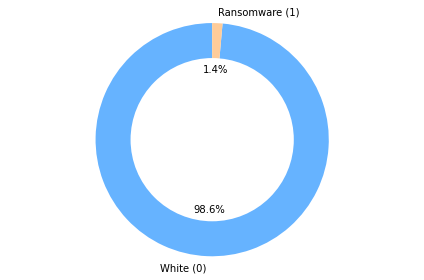

<Figure size 1440x1440 with 0 Axes>

In [11]:
#code to print pie chart

print('\t Distribution of target variable with Imbalance data ')
labels = ['White (0)', 'Ransomware (1)']
sizes = [pd.Series(data.label).value_counts()[0], pd.Series(data.label).value_counts()[1]]
explode = (0, 0.1)
colors = ['#66b3ff','#ffcc99']
fig1, ax1 = plt.subplots()
ax1.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', startangle=90)
#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.show()
plt.figure(figsize=(20,20))
plt.savefig('Distribution of TV with Imbalance data.png', transparent=True, bbox_inches='tight')

# handling Imbalance issue

####  1. Find Number of samples which are Ransomware

In [12]:
ransomware = len(data[data['label'] == 1])

#### 2. Get indices of non Ransomware samples

In [13]:
non_ransomware_indices = data[data.label == 0].index

#### 3. Random sample non Ransomware indices

In [14]:
random_indices = np.random.choice(non_ransomware_indices,ransomware, replace=False)

#### 4. Find the indices of Ransomware samples

In [15]:
ransomware_indices = data[data.label == 1].index

#### 5. Concat fraud indices with sample non-Ransomware ones

In [16]:
under_sample_indices = np.concatenate([ransomware_indices,random_indices])

#### 6. Get Balance Dataframe

In [17]:
under_sample = data.loc[under_sample_indices]

In [18]:
under_sample.label.value_counts()

0    41413
1    41413
Name: label, dtype: int64

	 Distribution of Target Variable with Balanced data


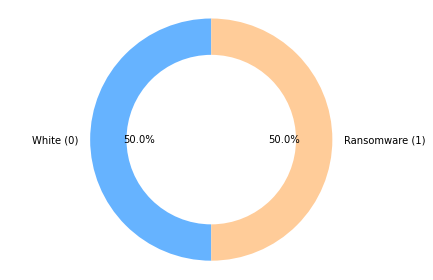

<Figure size 1440x1440 with 0 Axes>

In [19]:
#code to print pie chart

print('\t Distribution of Target Variable with Balanced data')
labels = ['White (0)', 'Ransomware (1)']
sizes = [pd.Series(under_sample.label).value_counts()[0], pd.Series(under_sample.label).value_counts()[1]]
explode = (0, 0.1)
colors = ['#66b3ff','#ffcc99']
fig1, ax1 = plt.subplots()
ax1.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', startangle=90)
#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.show()

plt.figure(figsize=(20,20))
plt.savefig('Distribution of TV with Balanced data.png', transparent=True, bbox_inches='tight')

## Baseline

In [53]:
from sklearn.preprocessing     import StandardScaler
from sklearn.linear_model      import LogisticRegression
from sklearn.model_selection   import train_test_split

In [48]:
X = under_sample.drop('label',axis=1)
y = under_sample.label

to_be_dropped = ['address']
X = X.drop(to_be_dropped, axis=1, errors='ignore')

std_scale = StandardScaler()
X_sc = std_scale.fit_transform(X) 

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X_sc, y,test_size = 0.2, random_state=42)

In [50]:
logit = LogisticRegression(C = 1000) # c=comblictiy , to deal with regularaization. , take c from gridsearch.
logit.fit(X_train, y_train)
print("The score for logistic regression is")
print("Training: {:6.2f}%".format(100*logit.score(X_train, y_train)))
print("Test set: {:6.2f}%".format(100*logit.score(X_test, y_test)))

The score for logistic regression is
Training:  61.91%
Test set:  61.35%


In [51]:
print("confusion matrix: \n\n", confusion_matrix(y_test, logit.predict(X_test)))

confusion matrix: 

 [[4271 4016]
 [2386 5893]]


In [54]:
y_predict = logit.predict(X_test)

print("Default threshold:")
print("Precision: {:6.4f},   Recall: {:6.4f}".format(precision_score(y_test, y_predict), 
                                                     recall_score(y_test, y_predict)))

Default threshold:
Precision: 0.5947,   Recall: 0.7118


In [56]:
y_predict=logit.predict(X_test)
print("F score::", f1_score(y_test,y_predict))

F score:: 0.6480096767099186


## Feature  Distribution 

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level 

(30000000.0, 35241663711300.0)

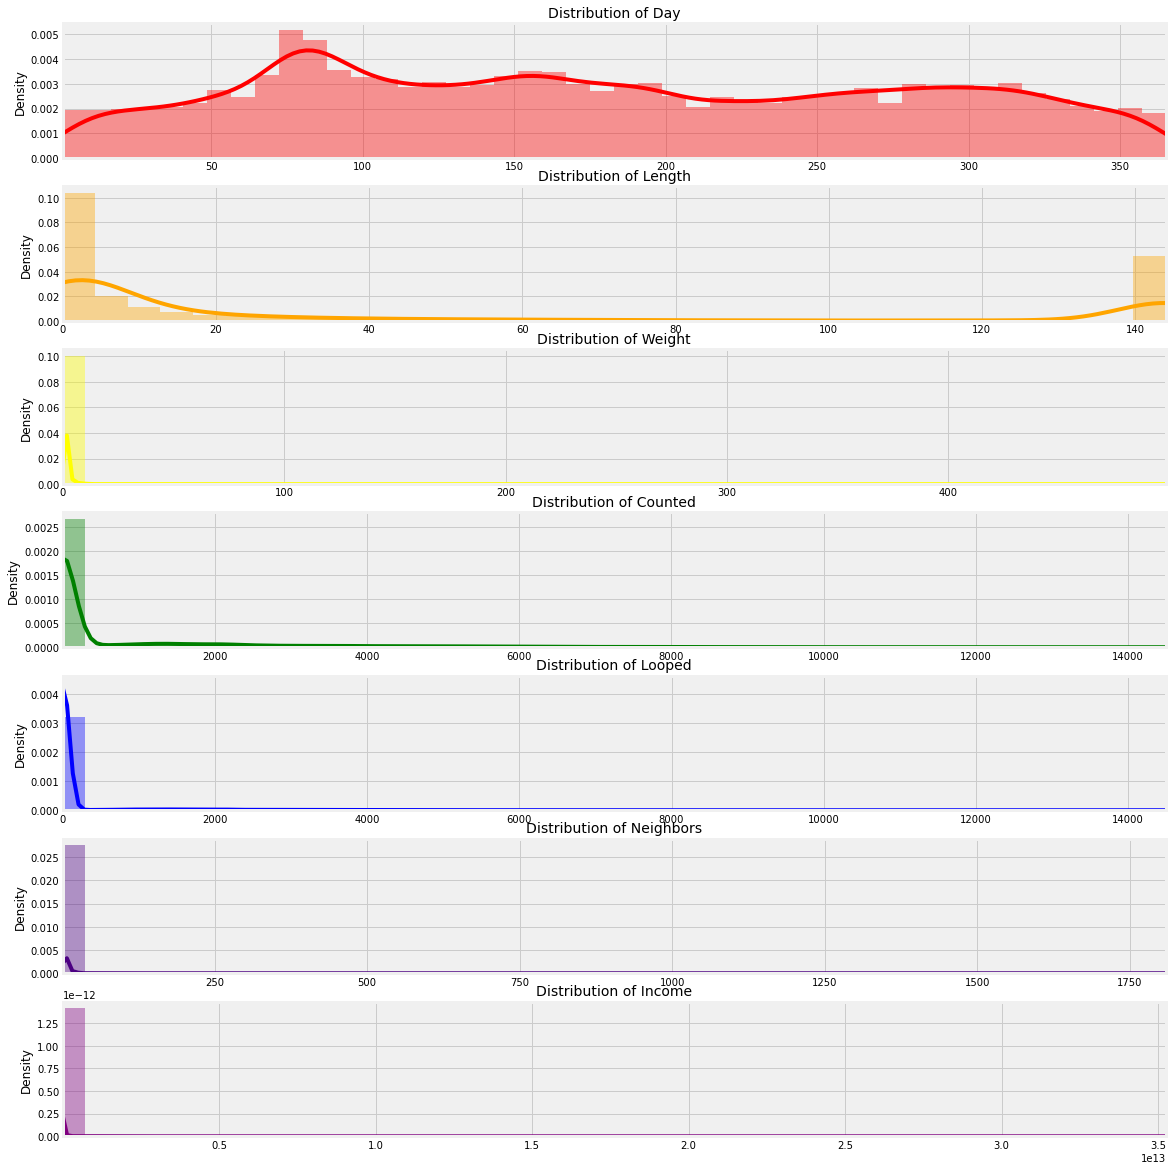

In [57]:
# distplot to show how the data is distributed.

fig, ax = plt.subplots(7, 1,figsize=(16,16))
fig.tight_layout()

day_val       = under_sample.day.values
length_val    = under_sample.length.values
weight_val    = under_sample.weight.values
counted_val   = under_sample.counted.values
looped_val    = under_sample.looped.values
neighbors_val = under_sample.neighbors.values
income_val    = under_sample.income.values

sns.distplot(day_val, ax=ax[0],color='red')
ax[0].set_title('Distribution of Day', fontsize=14)
ax[0].set_xlim([min(day_val), max(day_val)])

sns.distplot(length_val, ax=ax[1],color='orange')
ax[1].set_title('Distribution of Length', fontsize=14)
ax[1].set_xlim([min(length_val), max(length_val)])

sns.distplot(weight_val, ax=ax[2],color='yellow')
ax[2].set_title('Distribution of Weight', fontsize=14)
ax[2].set_xlim([min(weight_val), max(weight_val)])

sns.distplot(counted_val, ax=ax[3],color='green')
ax[3].set_title('Distribution of Counted', fontsize=14)
ax[3].set_xlim([min(counted_val), max(counted_val)])

sns.distplot(looped_val, ax=ax[4],color='blue')
ax[4].set_title('Distribution of Looped', fontsize=14)
ax[4].set_xlim([min(looped_val), max(looped_val)])

sns.distplot(neighbors_val, ax=ax[5],color='indigo')
ax[5].set_title('Distribution of Neighbors', fontsize=14)
ax[5].set_xlim([min(neighbors_val), max(neighbors_val)])

sns.distplot(income_val, ax=ax[6],color='purple')
ax[6].set_title('Distribution of Income', fontsize=14)
ax[6].set_xlim([min(income_val), max(income_val)])

Since the data is not in normal distribution, we will perform the Box-Cox transformation to transforms our data so that it closely resembles a normal distribution.
you will see later how the Box-Cox you change the distribution.

# Feature engineering

Extract features from raw data via data mining techniques,  
these features can be used to improve the performance of machine learning algorithms.

### 1. n_address_feature

The feature contains the number of times the address has been seen in the data set  
(boxcox transformation applied)

In [59]:
under_sample['address'].value_counts()

1LXrSb67EaH1LGc6d6kWHq8rgv4ZBQAcpU    420
16cVG72goMe4sNqZhnpmnqfCMZ1uSFbUit    261
12wQZTDmA8onM3sEt4jwcvzDxnNXxD8Vza    207
12YursV58dRT2c9iuZg3jEWfwgTDamBcnd    183
1LEq4WmpCrqBd7V3PywE2nvFUFC3QTe52x    176
                                     ... 
1PSvCh729M3s6EaTLc6kJ6dqz1VasMu4bq      1
15K2JQyKhneyAeoRbzDoepgAiM6PYL3agM      1
1Goj48wby2Uw67Y5VTCPX83VrpqntTURLX      1
1rg66dMstnubmx8Bqg9PZhWo7AXKowr68       1
16eKD7usxsjzkJ8Pdr6VNsdHpPYbCw7qAt      1
Name: address, Length: 61926, dtype: int64

In [60]:
n_addresses = list(under_sample['address'].value_counts())

In [61]:
print('An address is repeated an average of {} number of times'.format(np.mean(n_addresses)))

An address is repeated an average of 1.3374995962923488 number of times


C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


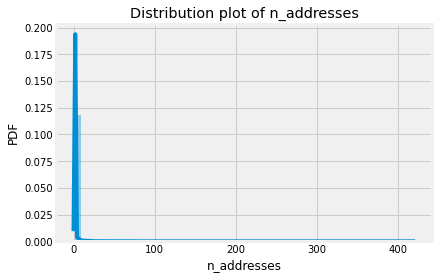

In [62]:
#plot to print distribution of n_addresses

plt.title('Distribution plot of n_addresses')
sns.distplot(n_addresses)
plt.xlabel('n_addresses')
plt.ylabel('PDF')
plt.show()

In [63]:
dict_n_address = dict(under_sample['address'].value_counts())
#dict_n_address contains a dictionary of addresses and the number of times they appear in data set

n_address = boxcox(np.array(list(dict_n_address.values())))[0]
#Applying boxcox over all the number of times each address apears

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


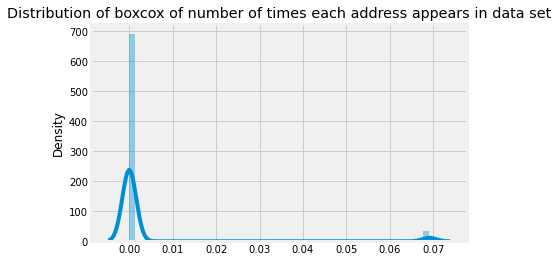

In [64]:
sns.distplot(n_address)
plt.title('Distribution of boxcox of number of times each address appears in data set')
plt.show()

In [65]:
len(n_address) == len(np.array(list(dict_n_address.values()))) #just a sanity check

True

In [66]:
for index, key in tqdm(enumerate(dict_n_address.keys())):
    #We are updating the dictionary with number of times each address appears with
    #the boxcox transformation applied to fix the skewness
    updated = {key: n_address[index]}
    dict_n_address.update(updated)

0it [00:00, ?it/s]

In [67]:
pd.Series(list(dict_n_address.values())).value_counts()

0.000000    59075
0.069118     1069
0.069121      431
0.069121      406
0.069121      219
0.069121      188
0.069121      149
0.069121      107
0.069121       73
0.069121       73
0.069121       54
0.069121       48
0.069121       34
dtype: int64

In [69]:
n_address_feature = np.array([])

for index, row in tqdm(under_sample.iterrows(), total=under_sample.shape[0]):
    #We are getting a list of the new values
    #For each address in the data set we are appending its corresponding boxcox'd
    #number of times its appeared in data set

    n_address_i = dict_n_address.get(under_sample.loc[index]['address']) 
    n_address_feature= np.append(n_address_feature, n_address_i)

  0%|          | 0/82826 [00:00<?, ?it/s]

### 2. quarter_number

Feature indicates which quarter of the year the day number belongs to.

In [70]:
def get_quarter(day):
    if day <= 91:
        #First 3 months, so we return quarter number = 1
        return 1
    elif day <= 91 * 2:
        #Next 3 months, quarter number = 2
        return 2
    elif day <= 91 * 3:
        #Next 3 months, quarter number = 3
        return 3
    else:
        #Last 4 months, quarter nubmer = 4
        return 4

In [71]:
quarter_number_feature = np.array([])
day_train = under_sample['day']

for day in tqdm(day_train):
    #For each day, we append its correspoding quarter number

    quarter_number_feature = np.append(quarter_number_feature, get_quarter(day))

  0%|          | 0/82826 [00:00<?, ?it/s]

### 3. is_close_to_holiday

Feature indicates if the day number was close to a major public holiday in America.

In [72]:
public_holidays = [
    1, #New Year’s Day, January 1
    15, #Birthday of Martin Luther King, Jr, 15 January
    53, #Washington's birthday February 22
    151, #Memorial day, May 31
    185, #Independence day, July 4
    121, #Labor day, May 1
    285, #Columbus day, October 12
    315, #Veteran's day, November 11
    330, #Thanksgiving day, November 26
    360, #Christmas day, December 25
]

In [73]:
def is_close(holiday, day):
    #if the day is within 1 week leading upto the holiday or after the holiday return True
    if np.abs(holiday - day) > 7:
        return 0
    return 1

In [74]:
is_close_to_holiday = np.array([], dtype=int)
for index, day in tqdm(enumerate(under_sample['day'])):
    #For each day, we check if its close to any major holiday; if so, we append 1 else 0

    is_close_to_holiday = np.append(is_close_to_holiday, any([is_close(holiday, day) for holiday in public_holidays]))

0it [00:00, ?it/s]

### 4. day_of_the_week

Feature indicates the number of the weekday (for eg: 0 for Monday and 6 for Sunday).  
The hypothesis is that the day of the week might correlate with the nature of the transaction.

In [75]:
def get_day_number(first_day, day_i):
    #return day number (0 for monday, 6 for sunday) for day_i
    return (first_day + day_i - 1) % 7

In [76]:
day_of_week = np.array([])
for index, row in tqdm(under_sample.iterrows()):
    #For each data-point, we consider its year and day and calculate what day of the week (Monday, Tuesday, etc)
    #it was when the transaction happened
    
    #datetime.datetime(year, 1, 1).weekday() returns the first day of the year in the year = year
    #using this information, we can calculate the present day

    year_i, day_i = row['year'], row['day']
    day_of_week = np.append(day_of_week, get_day_number(datetime.datetime(year_i, 1, 1).weekday(), day_i))

0it [00:00, ?it/s]

### 5. gaussian_length

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[]

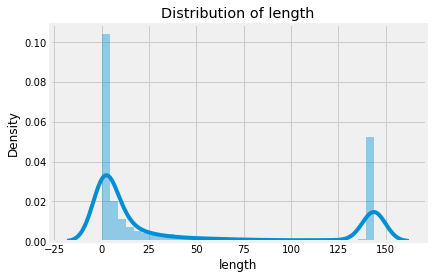

In [78]:
# Looking at its distribution

sns.distplot(under_sample['length'])
plt.title('Distribution of length')
plt.plot()

Feature tries to fix the skewness of the length variable.   
This is done by applying complex functions over the length feature and then performing a boxcox operation on it.

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


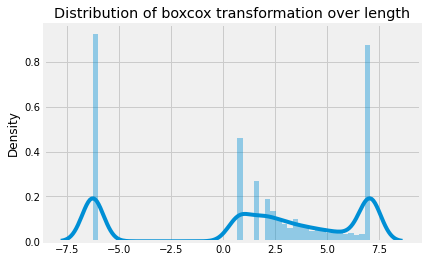

In [79]:
# applying box-cox transformation

sns.distplot(boxcox(np.array(under_sample['length']) + 1e-6)[0])
plt.title('Distribution of boxcox transformation over length')
plt.show()

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


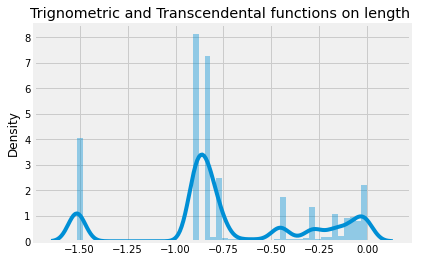

In [80]:
#We can see a sort of 'cyclic' waveform in the above graph. it appears that we have an
#alternating pattern of high and low values. maybe sin transform might help?

sns.distplot(boxcox((np.sin(np.log(np.sqrt(np.array(under_sample['length']) + 1e-6)))) ** 2)[0])
plt.title('Trignometric and Transcendental functions on length ')
plt.show()

These transformations make the distribution more gaussian and thus, will help during modelling.

In [82]:
gaussian_length = boxcox((np.sin(np.log(np.sqrt(np.array(under_sample['length']) + 1e-6)))) ** 2)[0]

### 6. gaussian_weight

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


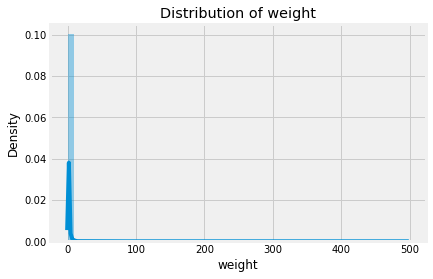

In [83]:
# Looking at its distribution

sns.distplot(under_sample['weight'])
plt.title('Distribution of weight')
plt.show()

Feature corrects for the skewedness in weight.

C:\Users\user\anaconda3\lib\site-packages\numpy\core\_methods.py:232: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


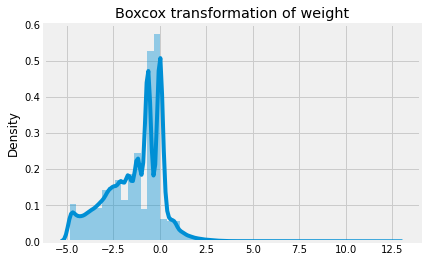

In [84]:
sns.distplot(boxcox(np.array(under_sample['weight'], dtype= float))[0])
plt.title('Boxcox transformation of weight')
plt.show()

In [85]:
#Apply boxcox transform on weight
gaussian_weight = np.array(boxcox(np.array(under_sample['weight'],  dtype=float))[0])

C:\Users\user\anaconda3\lib\site-packages\numpy\core\_methods.py:232: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)


### 7. log_counted

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


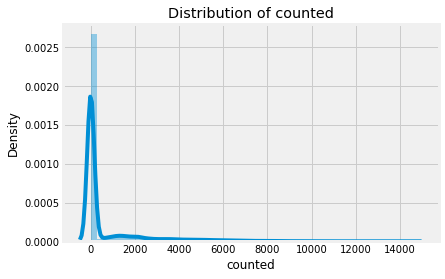

In [86]:
# Looking at its distribution

sns.distplot(under_sample['counted'])
plt.title('Distribution of counted')
plt.show()

Performing log-transformation to fix skewedness.

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


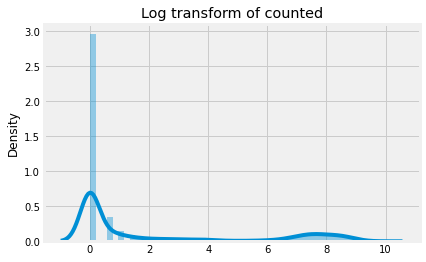

In [87]:
sns.distplot(np.log(np.array(under_sample['counted']) + 1e-6))
plt.title('Log transform of counted')
plt.show()

While performing log to get a normal-distribution still gives us a skewed distribution, 
it is certainly better than the vanilla feature.

In [89]:
#apply log-transform on counted column

log_count = np.log(np.array(under_sample['counted']) + 1e-6)

### 8. sigmoid_looped

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


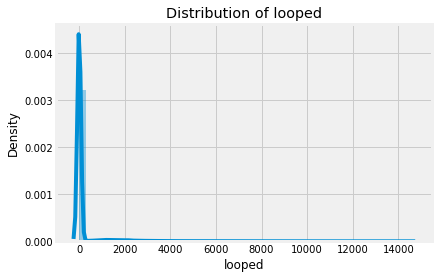

In [90]:
# Looking at its distribution

sns.distplot(under_sample['looped'])
plt.title('Distribution of looped')
plt.show()

Performing sigmoid operation to fix skewedness.

In [91]:
def sigmoid(x):
    #returns the logistic function of x
    
    return 1 / (1 + np.exp(-x))

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


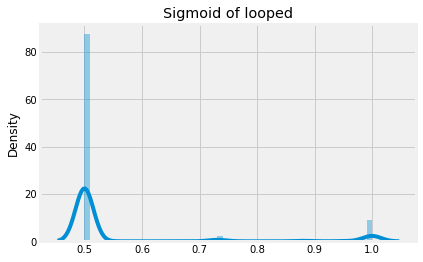

In [92]:
sns.distplot(sigmoid(np.array(under_sample['looped'])))
plt.title('Sigmoid of looped')
plt.show()

Sigmoidal transformation gives the models a better distribution to work with.

In [93]:
#Applying logistic function on each element of looped

sigmoid_looped = sigmoid(np.array(under_sample['looped']))

### 9. gaussian_neighbors

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


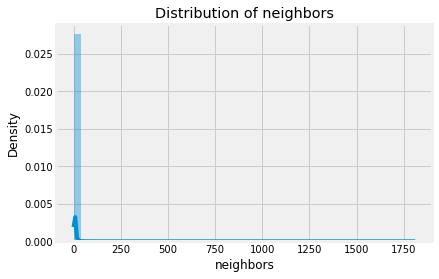

In [94]:
# Looking at its distribution

sns.distplot(under_sample['neighbors'])
plt.title('Distribution of neighbors')
plt.show()

Feature tries to account for the extreme skewedness of neighbors by applying boxcox transformation.

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


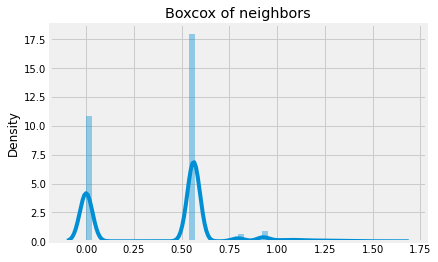

In [96]:
sns.distplot(boxcox(np.array(under_sample['neighbors']) + 1e-6)[0])
plt.title('Boxcox of neighbors')
plt.show()

Boxcox transformation over Neighbors gives us a slighly more gaussian distribution.

In [97]:
#Applying boxcox transform for neighbors

gaussian_neighbors = boxcox(np.array(under_sample['neighbors']) + 1e-6)[0]

### 10. gaussian_income

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


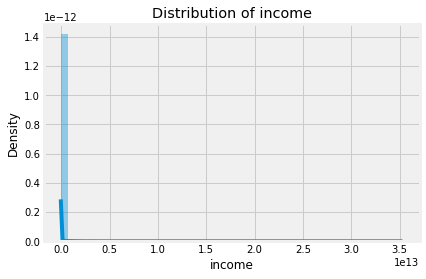

In [98]:
# Looking at its distribution

sns.distplot(under_sample['income'])
plt.title('Distribution of income')
plt.show()

Feature tries to account for the extreme skewedness of income by applying boxcox transformation.

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


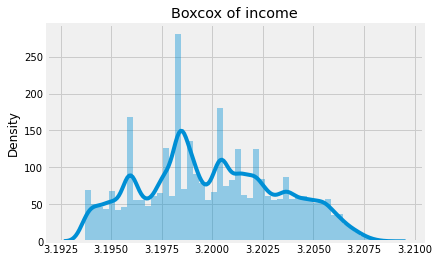

In [100]:
sns.distplot(boxcox(np.array(under_sample['income']) + 1e-6)[0])
plt.title('Boxcox of income')
plt.show()

Boxcox transformation over Income gives us a psuedo-gaussian distribution.

In [102]:
#Applying boxcox on income

gaussian_income = boxcox(np.array(under_sample['income']) + 1e-6)[0]

## Interaction features

### 11. Interaction_length_weight

In [103]:
# Between length and weight

median_length = np.median(under_sample['length'])
median_weight = np.median(under_sample['weight'])

def get_length_weight(length_i, weight_i):
    #If length and weight are greater than the median, we will return 0
    #If just length is greater than the median we return 1
    #return 2 if length is lesser than median
    
    if length_i > median_length:
        if weight_i > median_weight:
            return 0
        else:
            return 1
    return 2

In [104]:
#Constructing the interaction feature for train

interaction_length_weight = np.array([])
for index, row in tqdm(under_sample.iterrows(), total=under_sample.shape[0]):
    interaction_length_weight = np.append(interaction_length_weight, get_length_weight(row['length'], row['weight']))

  0%|          | 0/82826 [00:00<?, ?it/s]

### 12. Interaction_count_income 

In [105]:
# Between log-count and gaussian-income

median_count = np.median(log_count)
median_income = np.median(gaussian_income)

def get_count_income(log_count_i, gaussian_income_i):
    #Return 0 if both log_count and gaussian_income are greater than their medians
    #return 1 if just log_count is
    #return 2 if log count is lesser than median
    
    if log_count_i > median_count:
        if gaussian_income_i > median_income:
            return 0
        else:
            return 1
    return 2

In [106]:
#construct the interaction feature
    
interaction_count_income = np.array([])
for i in tqdm(range(len(log_count))):
    interaction_count_income = np.append(interaction_count_income, get_count_income(log_count[i], gaussian_income[i]))

  0%|          | 0/82826 [00:00<?, ?it/s]

## Loading all the features into the dataset

In [107]:

#Adding the features

under_sample['n_address'] = n_address_feature #1
under_sample['day_of_week'] = day_of_week#2
under_sample['is_close_to_holiday'] = is_close_to_holiday #3
under_sample['quarter_number'] = quarter_number_feature #4
under_sample['gaussian_income'] = gaussian_income #5
under_sample['gaussian_neighbors'] = gaussian_neighbors #6
under_sample['gaussian_weight'] = gaussian_weight#7
under_sample['gaussian_length'] = gaussian_length #8
under_sample['log_count'] = log_count #9
under_sample['sigmoid_looped'] = sigmoid_looped#10
under_sample['interaction_count_income'] = interaction_count_income #11
under_sample['interaction_length_weight'] = interaction_length_weight#12

In [108]:
under_sample.head()

,address,year,day,length,weight,counted,looped,neighbors,income,label,...,is_close_to_holiday,quarter_number,gaussian_income,gaussian_neighbors,gaussian_weight,gaussian_length,log_count,sigmoid_looped,interaction_count_income,interaction_length_weight
0,111K8kZAEnJg245r2cM6y9zgJGHZtJPy6,2017,11,18,0.008333,1,0,2,100050000.0,1,...,1,1.0,3.198400,5.628852e-01,-3.046316,-0.015776,9.999995e-07,0.5,2.0,1.0
1,1123pJv8jzeFQaCV4w644pzQJzVWay2zcA,2016,132,44,0.000244,1,0,1,100000000.0,1,...,0,2.0,3.198398,9.999992e-07,-3.984426,-0.103151,9.999995e-07,0.5,2.0,1.0
2,112536im7hy6wtKbpH1qYDWtTyMRAcA2p7,2016,246,0,1.000000,1,0,2,200000000.0,1,...,0,3.0,3.200401,5.628852e-01,0.000000,-0.894604,9.999995e-07,0.5,2.0,2.0
3,1126eDRw2wqSkWosjTCre8cjjQW8sSeWH7,2016,322,72,0.003906,1,0,2,71200000.0,1,...,1,4.0,3.197247,5.628852e-01,-3.308530,-0.321465,9.999995e-07,0.5,2.0,1.0
4,1129TSjKtx65E35GiUo4AYVeyo48twbrGX,2016,238,144,0.072848,456,0,1,200000000.0,1,...,0,3.0,3.200401,9.999992e-07,-2.025342,-0.834514,6.122493e+00,0.5,0.0,1.0


## Strore the Dataset as csv file

In [109]:
under_sample.to_csv('under_sample_Data.csv', index=False)